# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file = './data/train.p'
validation_file= './data/valid.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

#### First - Get a list of the sign names
This list contains the class numbers and their respective sign names - I will use that when displaying the signs

In [3]:
import pandas as pd

# Although this is not asked for explicitly here,
# I think it is a good idea to get the class names
# to display them along with the pictures

df_signs = pd.read_csv('signnames.csv')
df_signs.set_index(df_signs.columns[0],drop=True,inplace=True)

def sign_text(classId):
    return df_signs.loc[classId,df_signs.columns[0]]

df_signs.head(len(df_signs))

,SignName
ClassId,
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)


#### Now display images

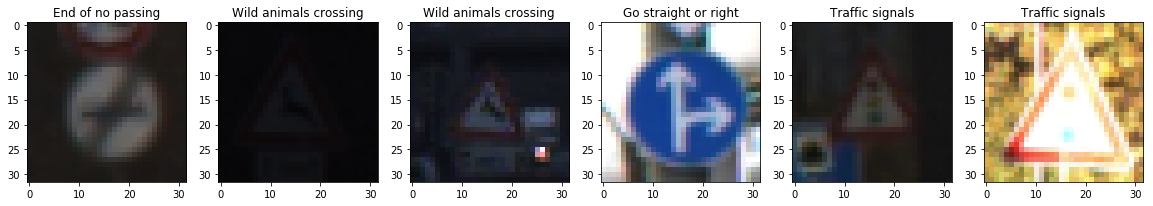

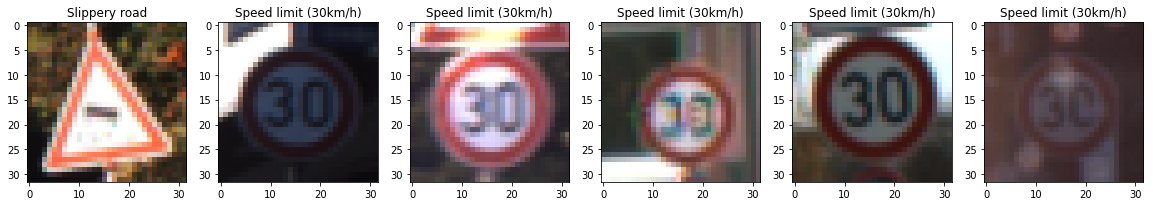

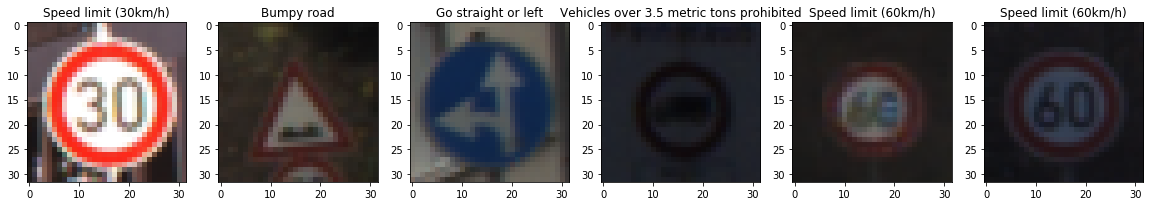

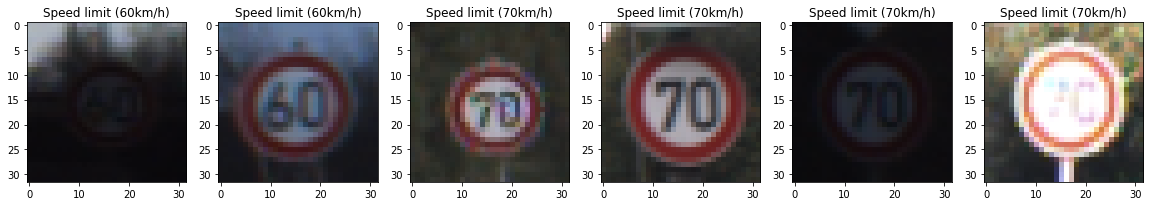

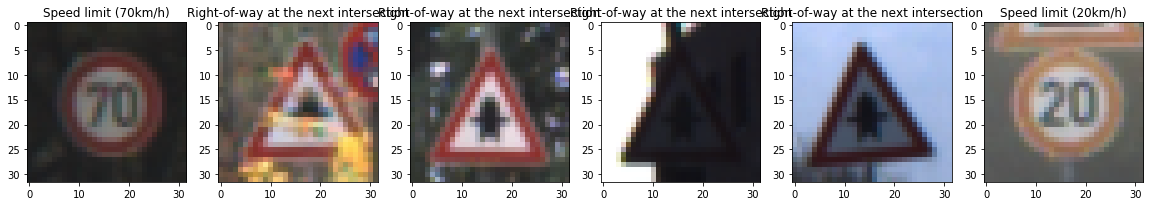

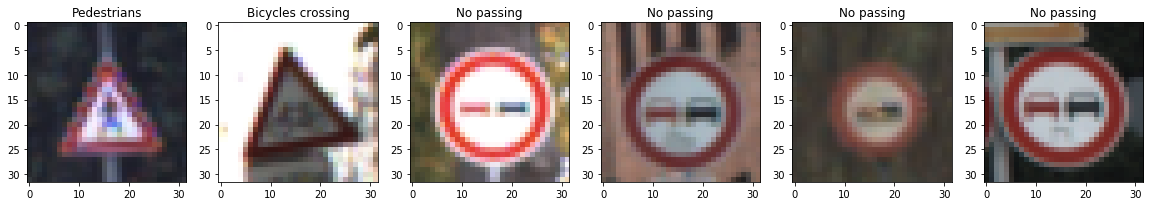

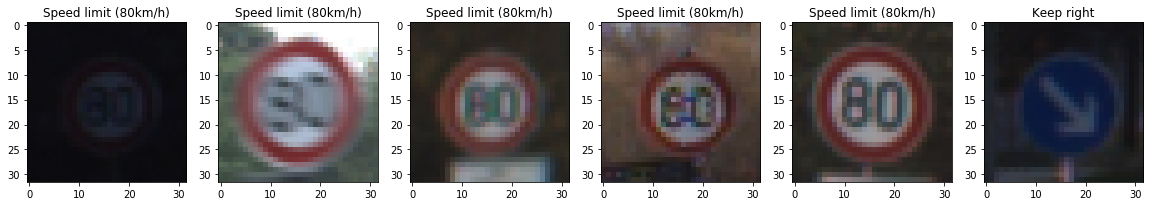

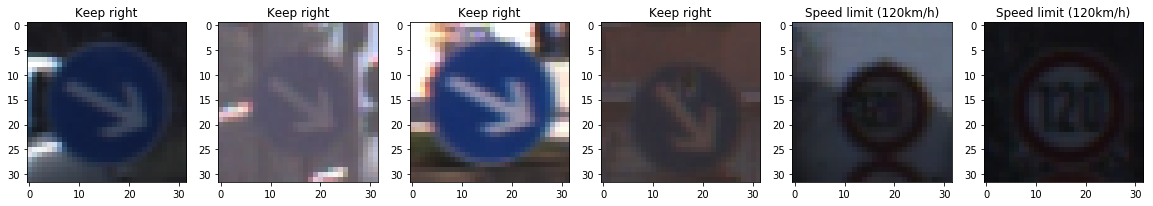

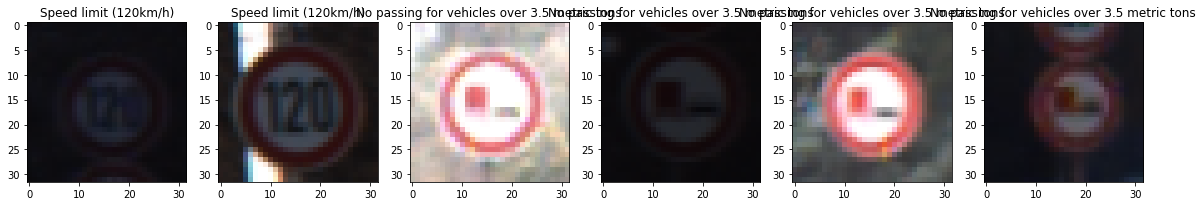

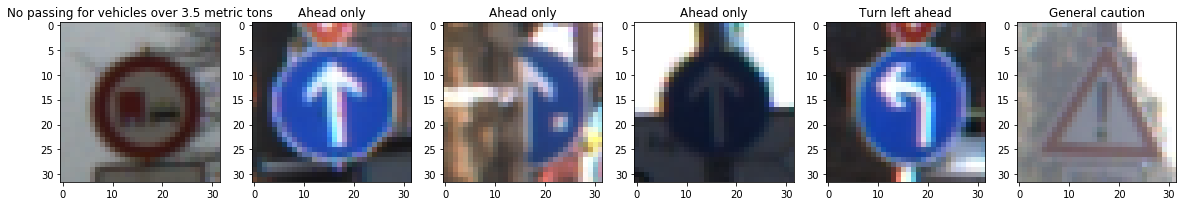

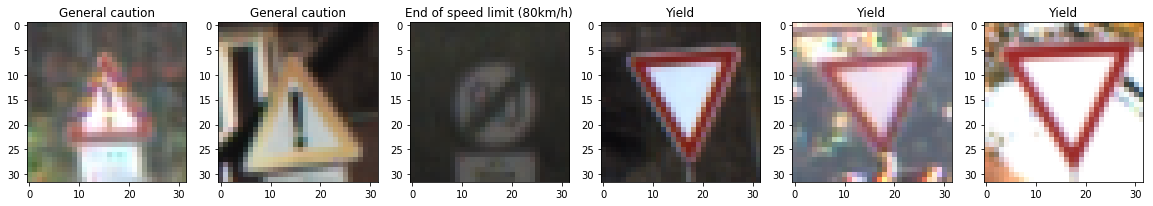

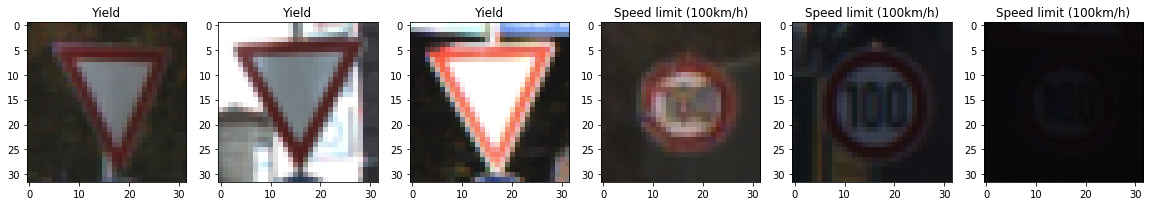

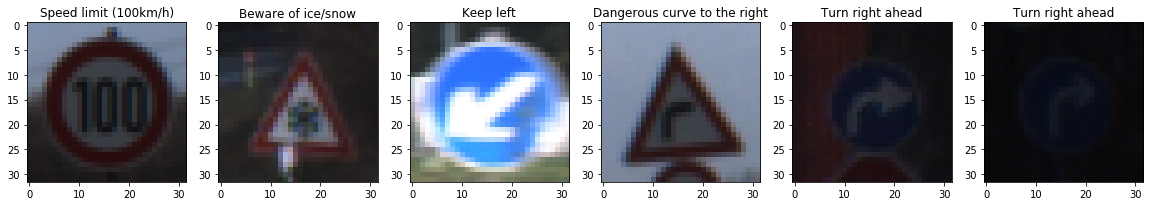

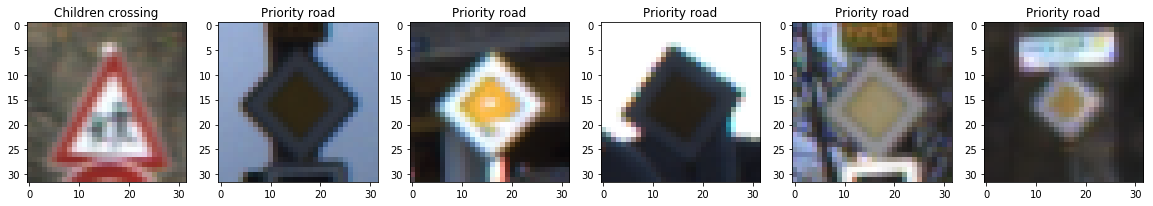

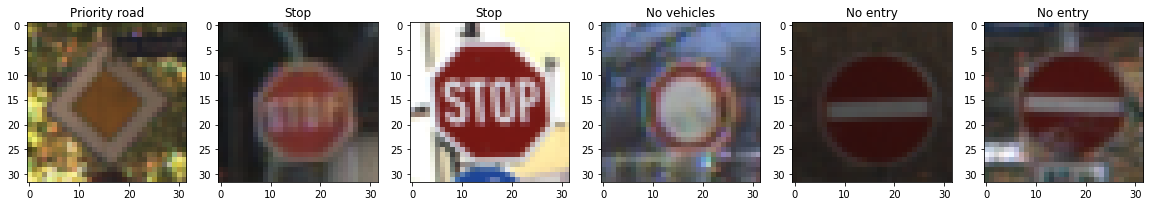

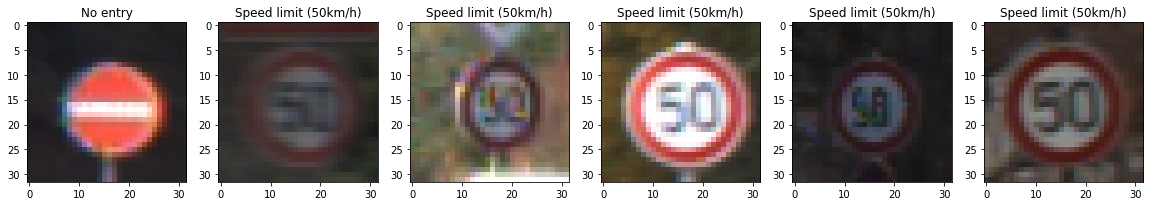

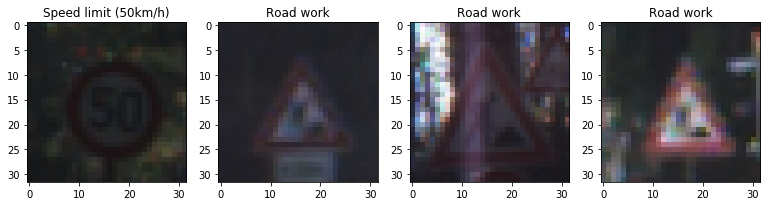

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline


############################################################################################
# Function to display a list of images and their labels
############################################################################################    

def display_images(images,labels,max_images = 100):

    n_images = len(images)

    # other variables to help with visualisation
    imgs_per_row = 6

    step = n_images // max_images

    img_row_index = 1
    img_count = 0

    # iterate through images, skipping every {step} images
    for i in range(0,n_images,step):

        img, lbl = images[i], labels[i]

        if img_row_index == 1:
            plt.figure(figsize=(20,10))

        plt.subplot(1,imgs_per_row,img_row_index)        
        plt.title(sign_text(lbl))
        plt.imshow(img)

        if img_row_index >= imgs_per_row:
            plt.show()
            img_row_index = 1
        else:
            img_row_index += 1


        img_count += 1
        if img_count >= max_images:
            break
            
# ------------------------------------------------------------------------------------------
# Call function
# ------------------------------------------------------------------------------------------
display_images(X_train,y_train)



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the **validation set accuracy will need to be at least 0.93**. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Checking data: Labels: 34799, Sum of all images: 34799


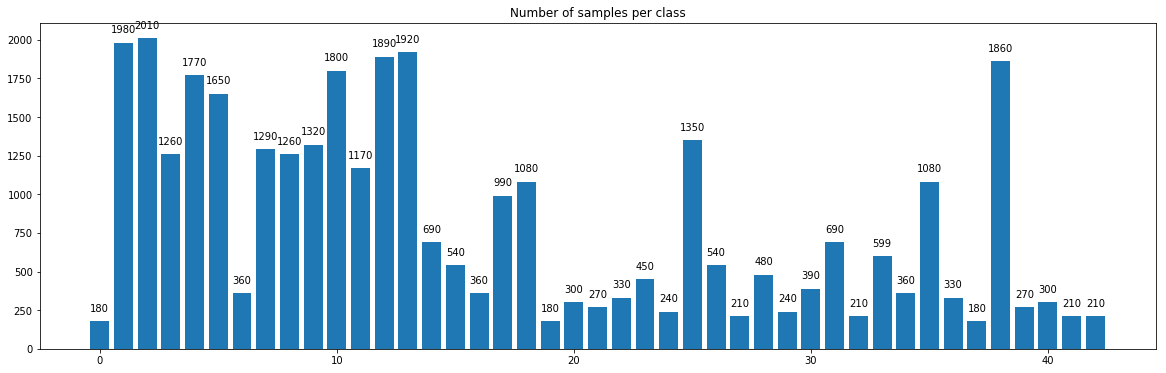

In [5]:
import numpy as np


############################################################################################
# Function to check class balance/imbalance
############################################################################################    

def check_balance(images,labels,n_classes):
    
    class_balance = []
    for i in range(n_classes):
        class_balance.append(np.count_nonzero(labels==i))

    max_class = max(class_balance)    

    print('Checking data: Labels: {}, Sum of all images: {}'.format(len(labels),sum(class_balance)))   

    plt.figure(figsize=(20,6))
    plt.bar(range(len(class_balance)),class_balance)
    for x,y in zip(range(len(class_balance)),class_balance):

        label = "{:3d}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center

    plt.title('Number of samples per class')
    plt.show()

    return class_balance


# ------------------------------------------------------------------------------------------
# Call function
# ------------------------------------------------------------------------------------------
class_balance = check_balance(X_train,y_train,n_classes)



In [6]:
from sklearn.utils import shuffle

# shuffle data
X_train, y_train = shuffle(X_train, y_train)

/root/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [7]:
import skimage as sk
from skimage import transform, util
import random


############################################################################################
# custom zoom translation
############################################################################################ 

def custom_zoom_translation(image):
    
    # scale up by random amount
    sc = random.uniform(0,.3)
    rescaled = sk.transform.rescale(image, 1 + sc, multichannel = True,anti_aliasing=False,mode='constant')

    # add random translation (left or right, up or down)
    f0 = random.uniform(0,1)
    f1 = random.uniform(0,1)
    
    s0 = int( (rescaled.shape[0] - image.shape[0]) * f0 )
    s1 = int( (rescaled.shape[1] - image.shape[1]) * f1 )
    
    return rescaled[ s0 : image.shape[0] + s0, s1 : image.shape[1] + s1] 



############################################################################################
# Augment data set
#
# The objective is to augment the number of samples per class and promote better balance
# NB -> "Better", but not full. 
#       We never create more images than already existed for a class
#       So the result is a less imbalanced set, but not perfectly balanced
#
############################################################################################ 

def augment_dataset(images,labels,class_balance):

    max_class = max(class_balance)  



    X_add = []
    y_add = []

    
    def coin_toss():
        return random.randint(0, 1)
            

    def go_augment(img_indexes,n,class_num):

        img_list = list(img_indexes[0])

        i = 0
        n_gen = 0


        while n_gen < n:

            
            # always perform a zoom and translation
            gen = custom_zoom_translation(images[img_list[i]])
            
            # randomly apply other transformations
            if coin_toss():
                # add random noise
                gen = sk.util.random_noise(gen)

            if coin_toss():
                # a little rotation for good measure
                random_degree = random.uniform(-20, 20)
                gen = sk.transform.rotate(gen, random_degree)
            
            
            X_add.append(gen)
            y_add.append(class_num)
            n_gen += 1
            i += 1

            if i >= len(img_list):
                i = 0

        print('generated {} images'.format(n_gen))
          

    for i,c in enumerate(class_balance):
        
        # augment images, but don't go crazy. the max number fo images to create is the same number of
        # images that already exist
        
        no_to_create = min( c * 2, (max_class-c))
        
        print("Class: {} - {} images, need to add {} images".format(i,c,no_to_create))
        go_augment( np.where(labels == i),no_to_create,i)

        
    X_add = np.array(X_add,dtype='float32')
    
    y_add = np.array(y_add,dtype='float32')
    
    images = np.concatenate((images, X_add), axis=0)
    labels = np.concatenate((labels, y_add), axis=0)
    
    # check some of the generated images
    display_images(X_add,y_add,50)
    
    return images, labels




In [8]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.


### define preprocessing functions
import cv2
import numpy as np


# X ... convert to grayscale
def preprocess_images(X):
    
    # create t new list
    result = []
    
    for img in X:
        # convert to grayscale ... color is irrelevant
        result.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
    
    # convert to np array, divide by 255 (normalise) and add a new axis to feed to tensorflow
    return  ( (np.array(result, dtype='float32') - 128) / 128) [:,:,:,np.newaxis]


## Answer writeup questions

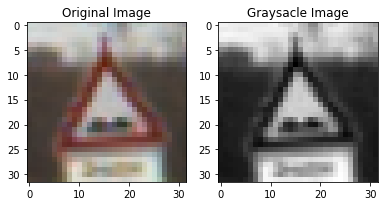

In [9]:
## show a random image with its respective random noise
from random import randint

random_img = X_train[randint(0,len(X_train))]
random_img_gray = cv2.cvtColor(random_img, cv2.COLOR_BGR2GRAY)


plt.figure(figsize=(20,10))
plt.subplot(1,6,3)        
plt.title("Original Image")
plt.imshow(random_img)

plt.subplot(1,6,4)        
plt.title("Graysacle Image")
plt.imshow(random_img_gray,cmap='gray')

plt.show()

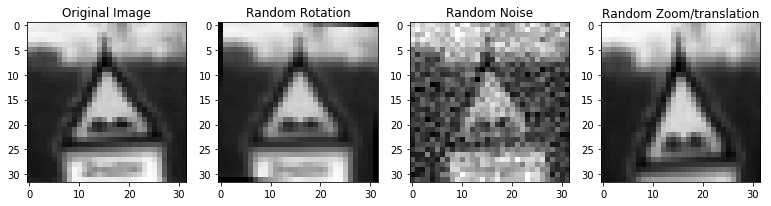

In [10]:
# now show some random noise

plt.figure(figsize=(20,10))
plt.subplot(1,6,1)        
plt.title("Original Image")
plt.imshow(random_img_gray,cmap='gray')


# random rotation
random_degree = random.uniform(-20, 20)
random_rotated = sk.transform.rotate(random_img_gray, random_degree)

plt.subplot(1,6,2)        
plt.title("Random Rotation")
plt.imshow(random_rotated,cmap='gray')


# random noise
random_noise = gen = sk.util.random_noise(random_img_gray)

plt.subplot(1,6,3)        
plt.title("Random Noise")
plt.imshow(random_noise,cmap='gray')


random_zoom = custom_zoom_translation(random_img_gray)

plt.subplot(1,6,4)        
plt.title("Random Zoom/translation")
plt.imshow(random_zoom,cmap='gray')

plt.show()

Class: 0 - 180 images, need to add 360 images
generated 360 images
Class: 1 - 1980 images, need to add 30 images
generated 30 images
Class: 2 - 2010 images, need to add 0 images
generated 0 images
Class: 3 - 1260 images, need to add 750 images
generated 750 images
Class: 4 - 1770 images, need to add 240 images
generated 240 images
Class: 5 - 1650 images, need to add 360 images
generated 360 images
Class: 6 - 360 images, need to add 720 images
generated 720 images
Class: 7 - 1290 images, need to add 720 images
generated 720 images
Class: 8 - 1260 images, need to add 750 images
generated 750 images
Class: 9 - 1320 images, need to add 690 images
generated 690 images
Class: 10 - 1800 images, need to add 210 images
generated 210 images
Class: 11 - 1170 images, need to add 840 images
generated 840 images
Class: 12 - 1890 images, need to add 120 images
generated 120 images
Class: 13 - 1920 images, need to add 90 images
generated 90 images
Class: 14 - 690 images, need to add 1320 images
genera

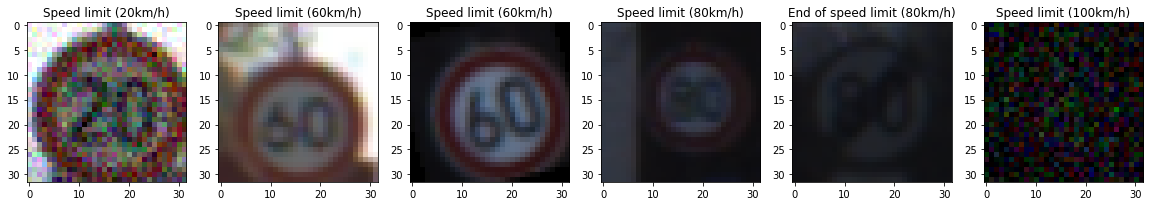

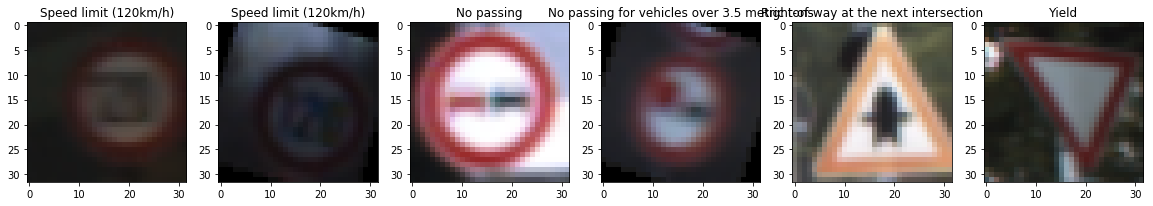

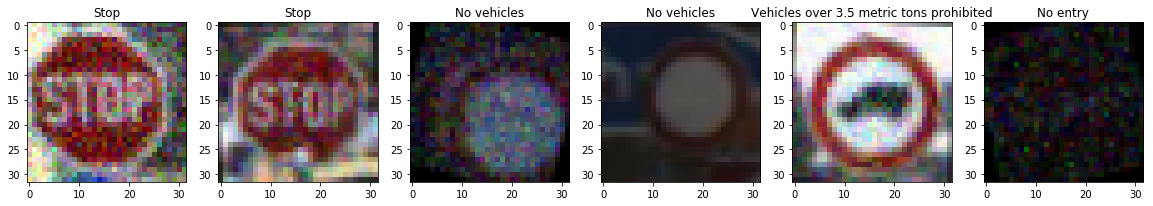

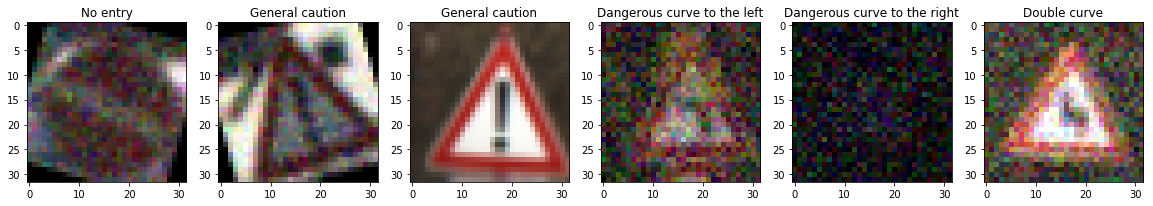

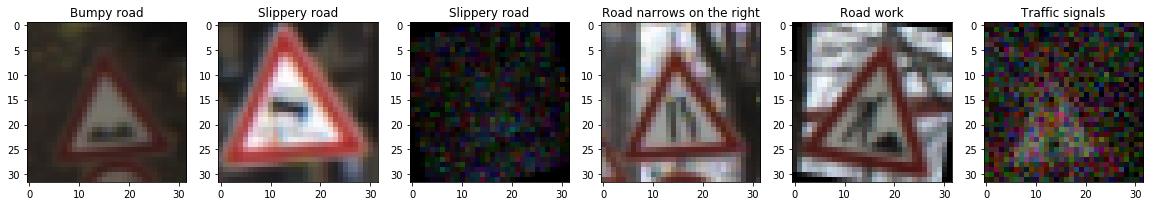

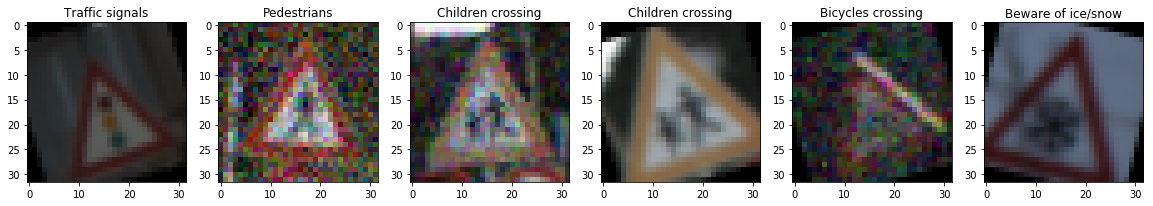

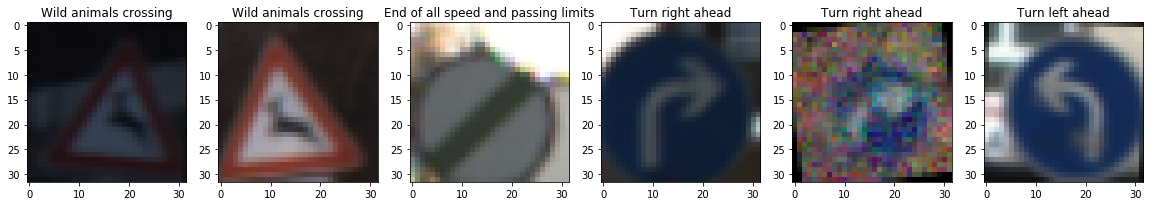

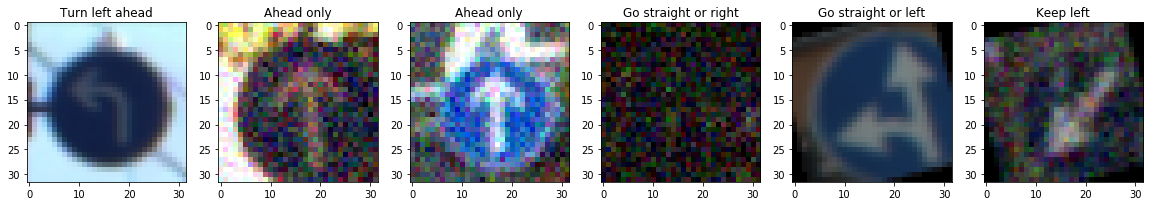

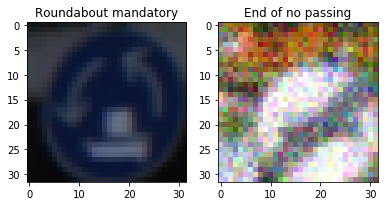

In [11]:

# # ------------------------------------------------------------------------------------------
# # Augment data
# # ------------------------------------------------------------------------------------------
aug_X_train, aug_y_train =  augment_dataset(X_train,y_train,class_balance)

Checking data: Labels: 61407, Sum of all images: 61407


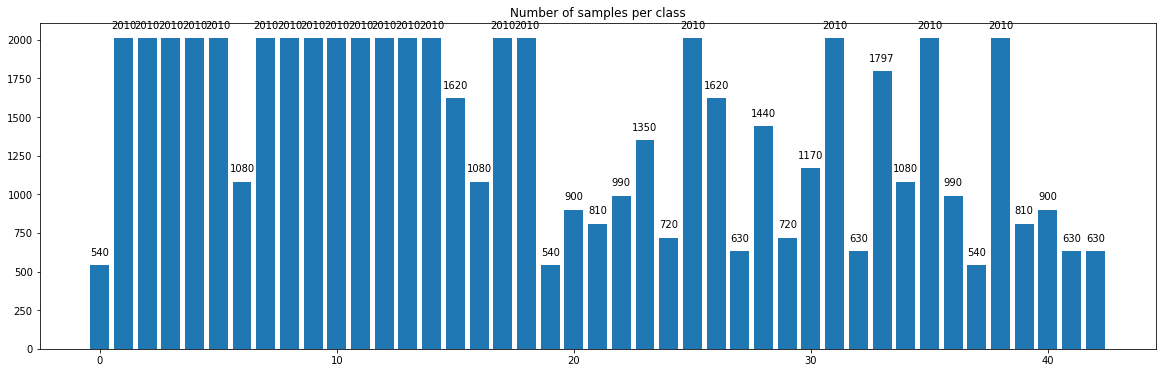

In [12]:
# # ------------------------------------------------------------------------------------------
# # Now check imbalance
# # ------------------------------------------------------------------------------------------
_ = check_balance(aug_X_train,aug_y_train,n_classes)

In [13]:
### NB ==>> after several trials with augemented data, I made the decision not to use the augmented set

### .. the commented-out code below is what I planned to use to bring the augmented data to the model

# from sklearn.utils import shuffle

# ## shuffle and reassign augmented sets to training data
X_train, y_train = shuffle(aug_X_train, aug_y_train)

In [14]:
### apply them

X_train = preprocess_images(X_train)
X_valid = preprocess_images(X_valid)
X_test = preprocess_images(X_test)

In [15]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(61407, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


### Model Architecture

In [16]:
### Define your architecture here.
### Feel free to use as many code cells as needed.


import tensorflow as tf

#NB => n_classes is already defined 

In [17]:
import random

# seeding random to have predictable results
random.seed(10)

mu = 0
sigma = 0.1
weights = {
    'wc1': tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 16), mean = mu, stddev = sigma)),
    'wc2': tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 32), mean = mu, stddev = sigma)),  
    'wd1': tf.Variable(tf.truncated_normal(shape=(5*5*32, 1024), mean = mu, stddev = sigma)),     
    'wd2': tf.Variable(tf.truncated_normal(shape=(1024, 256), mean = mu, stddev = sigma)),    
    'wd3': tf.Variable(tf.truncated_normal(shape=(256, 128), mean = mu, stddev = sigma)),  
    'wd4': tf.Variable(tf.truncated_normal(shape=(128, n_classes), mean = mu, stddev = sigma))}

biases = {
    'bc1': tf.Variable(tf.truncated_normal([16])),
    'bc2': tf.Variable(tf.truncated_normal([32])),
    'bd1': tf.Variable(tf.truncated_normal([1024])),
    'bd2': tf.Variable(tf.truncated_normal([256])),    
    'bd3': tf.Variable(tf.truncated_normal([128])),
    'bd4': tf.Variable(tf.truncated_normal([n_classes]))}

# define layers
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

def flatten(x, W):
    print('input shape is',W.shape)
    return tf.reshape(x, [-1, W.get_shape().as_list()[0]])    

def dense(x, W, b):
    return tf.add(tf.matmul(x, W), b )

def LeNet(x,weights=weights,biases=biases,dropout=0.7):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Convolutional. Input = 32x32x1. Output = 28x28x16.
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    
    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Pooling. Input = 28x28x16. Output = 14x14x16.
    conv1 = maxpool2d(conv1)
    
    # Convolutional. Output = 10x10x32.
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    
    # Activation.
    conv2 = tf.nn.relu(conv2)
    
    # Pooling. Input = 10x10x32. Output = 5x5x32.
    conv2 = maxpool2d(conv2) 
    
    # Flatten. Input = 5x5x32. Output = 5x5x32.
    ft1 = flatten(conv2,weights['wd1'])
    
    # Layer 3: Fully Connected. Input = 5x5x32. Output = 1024.
    fc1 = dense(ft1,weights['wd1'], biases['bd1'])
    
    # Activation.
    fc1 = tf.nn.relu(fc1)

    # dropout
    fc1 = tf.nn.dropout(fc1, dropout)
    
    # Layer: Fully Connected. Input = 1024. Output = 256.
    fc2 = dense(fc1,weights['wd2'], biases['bd2'])
    
    # Activation.
    fc2 = tf.nn.relu(fc2)
     
    # dropout   
    fc2 = tf.nn.dropout(fc2, dropout)

    # Layer 4: Fully Connected. Input = 256. Output = 124.
    fc3 = dense(fc2,weights['wd3'], biases['bd3'])
    
    # Activation.
    fc3 = tf.nn.relu(fc3)
     
    # dropout   
    fc3 = tf.nn.dropout(fc3, dropout)    
    
    # Layer 5: Fully Connected. Input = 124. Output = 43.
    logits = dense(fc3,weights['wd4'], biases['bd4'])
    
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [18]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

#### Define placeholders

In [19]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

#### "Compile" network

In [20]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

input shape is (800, 1024)


In [21]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data,batch_size):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [22]:
EPOCHS = 40
BATCH_SIZE = 128

def train_model(X_train,y_train,X_valid,y_valid,epochs=EPOCHS,batch_size=BATCH_SIZE,target_validation=None):
    
    history = {"train_acc": [], "valid_acc": []}
    
    highest_validation = 0

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)

        print("Training...")
        print()
        for i in range(epochs):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, batch_size):
                end = offset + batch_size
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

            training_accuracy = evaluate(X_train, y_train,batch_size)
            validation_accuracy = evaluate(X_valid, y_valid,batch_size)
            print("EPOCH {} ...".format(i+1))
            print("Accuracy ===> training: {:.3f}  Validation: {:.3f}".format(training_accuracy,validation_accuracy))
            print()
                  
            history["train_acc"].append(training_accuracy)
            history["valid_acc"].append(validation_accuracy)
            
            if validation_accuracy > highest_validation:
                saver.save(sess, './lenet')
                print("Model saved for validation accuracy of: {:.3f}".format(validation_accuracy))
                highest_validation = validation_accuracy

            if target_validation is not None and validation_accuracy > target_validation:
                # target reached ... stop here
                break
        print("The saved model reached a validation accuracy of: {:.3f}".format(highest_validation))
                  
    return history


In [23]:
def evaluate_model(X,y,batch_size=BATCH_SIZE):
    
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))

        test_accuracy = evaluate(X, y, batch_size)
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        
    return test_accuracy

In [24]:
history = train_model(X_train,y_train,X_valid,y_valid,epochs=EPOCHS,target_validation=.931)

Training...

EPOCH 1 ...
Accuracy ===> training: 0.364  Validation: 0.541

Model saved for validation accuracy of: 0.541
EPOCH 2 ...
Accuracy ===> training: 0.493  Validation: 0.759

Model saved for validation accuracy of: 0.759
EPOCH 3 ...
Accuracy ===> training: 0.528  Validation: 0.830

Model saved for validation accuracy of: 0.830
EPOCH 4 ...
Accuracy ===> training: 0.546  Validation: 0.849

Model saved for validation accuracy of: 0.849
EPOCH 5 ...
Accuracy ===> training: 0.557  Validation: 0.870

Model saved for validation accuracy of: 0.870
EPOCH 6 ...
Accuracy ===> training: 0.562  Validation: 0.881

Model saved for validation accuracy of: 0.881
EPOCH 7 ...
Accuracy ===> training: 0.568  Validation: 0.889

Model saved for validation accuracy of: 0.889
EPOCH 8 ...
Accuracy ===> training: 0.572  Validation: 0.899

Model saved for validation accuracy of: 0.899
EPOCH 9 ...
Accuracy ===> training: 0.573  Validation: 0.893

EPOCH 10 ...
Accuracy ===> training: 0.573  Validation: 0.899

In [25]:
test_accuracy = evaluate_model(X_test, y_test)

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.889


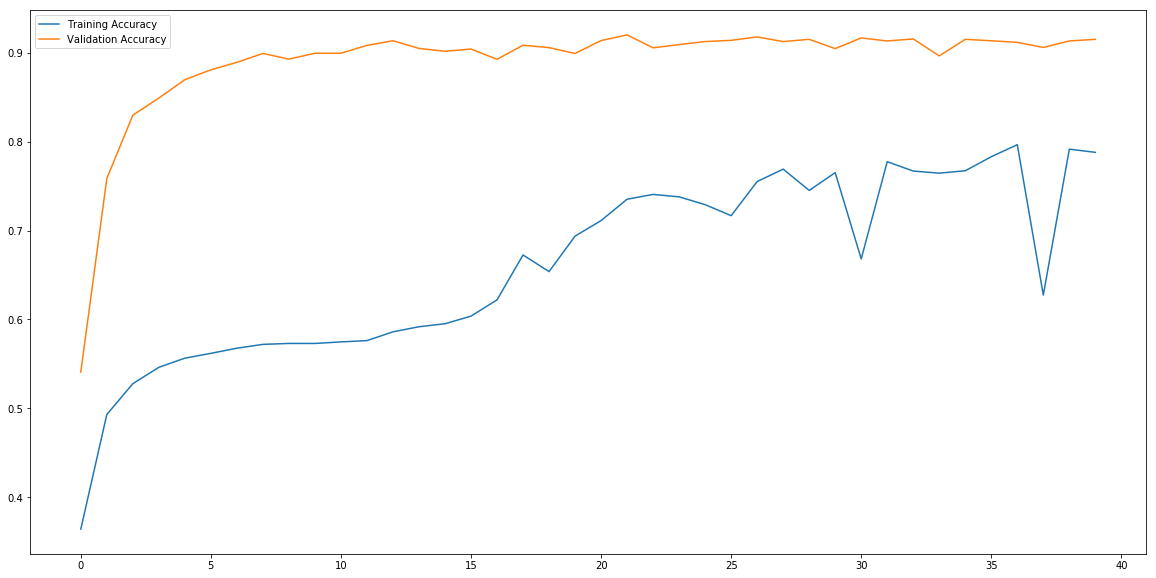

In [26]:
plt.figure(figsize=(20,10))
plt.plot(history["train_acc"],label="Training Accuracy")
plt.plot(history["valid_acc"],label="Validation Accuracy")
plt.legend()
plt.show()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

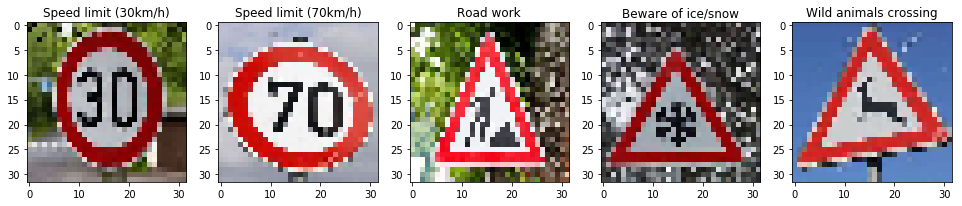

In [71]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

from glob import glob
# import cv2
from random import randint

classes = sorted(glob('./data/de-signs/*'))


############################################################################################
# Read data

# - I have copied the training set from the German signs (http://benchmark.ini.rub.de/)
# - the code below will read a random image for each class
#   and store the result in a list
############################################################################################ 

X_test_images = []
y_test_labels = []

for cl in classes:

    my_class = int(cl.split("/")[-1])
    
    files = glob(cl + "/*")
 
    img = plt.imread(files[0])
    
    # convert to same size
    img = cv2.resize(img,(32,32))
    
    # adding to 
    X_test_images.append(img)
    y_test_labels.append(my_class)

# afrter reading, display them
display_images(X_test_images,y_test_labels,max_images=len(X_test_images))

### Predict the Sign Type for Each Image

In [72]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# first convert them to the right format

X_untouched_images = X_test_images.copy() # keep a copy to print later

X_test_images = preprocess_images(np.array(X_test_images))
y_test_labels = np.array(y_test_labels)


In [73]:
# now use this this function to run a prediction and get the results

def predict(X,k=1):
    with tf.Session() as sess:

        # restore weights
        saver.restore(sess, tf.train.latest_checkpoint('.'))   

        # run prediction
        prediction = sess.run(tf.nn.softmax(sess.run(logits, feed_dict={x: X})))
        result = sess.run(tf.nn.top_k(tf.constant(prediction), k=k))
    
    return result

In [74]:
# now let us create the dataframe with the writeup responses
result = predict(X_test_images)


# I can see here that the top choice was the correct one
result_list = []

for p,y in zip(result[1],y_test_labels):
    result_list.append([p[0],sign_text(p[0]),y,sign_text(y)])
    
df_result = pd.DataFrame(result_list,columns=["p","Prediction","y","Image"])

df_1 = df_result[["Image","Prediction"]]



INFO:tensorflow:Restoring parameters from ./lenet


In [77]:
df_1.head(len(df_1))

,Image,Prediction
0,Speed limit (30km/h),Speed limit (30km/h)
1,Speed limit (70km/h),Speed limit (70km/h)
2,Road work,Road work
3,Beware of ice/snow,Children crossing
4,Wild animals crossing,Dangerous curve to the left


### Analyze Performance

In [85]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

# NB -> this calculation was performed in function `evaluate_model()`, defined above

# de_test_accuracy = evaluate_model(X_test_images,y_test_labels)
# print("Test Accuracy based on German Signs = {:.3f}".format(de_test_accuracy))

de_test_accuracy = len(df_result[(df_result.y == df_result.p)]) / len(df_result) * 100
print("Test Accuracy based on German Signs = {:.1f}%".format(de_test_accuracy))

Test Accuracy based on German Signs = 60.0%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [86]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
# this is what was requested as part of this exercise
result = predict(X_test_images,5)

print(result)

INFO:tensorflow:Restoring parameters from ./lenet
TopKV2(values=array([[  9.99912143e-01,   5.15225765e-05,   1.82617841e-05,
          1.72037071e-05,   4.05409310e-07],
       [  1.00000000e+00,   5.19690566e-08,   4.76536501e-16,
          1.20555616e-19,   5.51929091e-20],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   3.82220200e-10,   5.96201283e-11,
          4.68444858e-12,   3.81337740e-17],
       [  9.42826867e-01,   5.24662845e-02,   3.35078011e-03,
          1.03801640e-03,   3.14947945e-04]], dtype=float32), indices=array([[ 1, 38,  0,  3, 32],
       [ 4,  0,  8,  7,  1],
       [25,  0,  1,  2,  3],
       [28, 11, 41, 30,  9],
       [23, 11, 19, 31, 21]], dtype=int32))


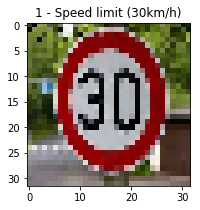

,Probability,Prediction
0,9.999121e-01,Speed limit (30km/h)
1,5.152258e-05,Keep right
2,1.826178e-05,Speed limit (20km/h)
3,1.720371e-05,Speed limit (60km/h)
4,4.054093e-07,End of all speed and passing limits


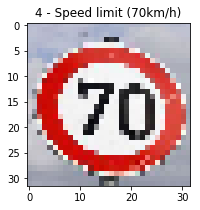

,Probability,Prediction
0,1.000000e+00,Speed limit (70km/h)
1,5.196906e-08,Speed limit (20km/h)
2,4.765365e-16,Speed limit (120km/h)
3,1.205556e-19,Speed limit (100km/h)
4,5.519291e-20,Speed limit (30km/h)


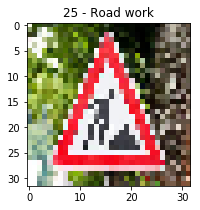

,Probability,Prediction
0,1.0,Road work
1,0.0,Speed limit (20km/h)
2,0.0,Speed limit (30km/h)
3,0.0,Speed limit (50km/h)
4,0.0,Speed limit (60km/h)


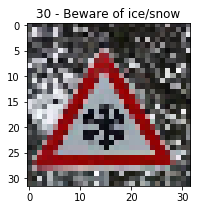

,Probability,Prediction
0,1.000000e+00,Children crossing
1,3.822202e-10,Right-of-way at the next intersection
2,5.962013e-11,End of no passing
3,4.684449e-12,Beware of ice/snow
4,3.813377e-17,No passing


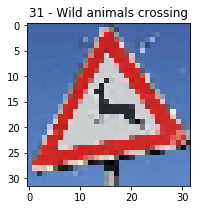

,Probability,Prediction
0,0.942827,Slippery road
1,0.052466,Right-of-way at the next intersection
2,0.003351,Dangerous curve to the left
3,0.001038,Wild animals crossing
4,0.000315,Double curve


In [104]:
# visualize them in a better way

from IPython.display import display

# I can see here that the top choice was the correct one
for p,i,y,img in zip(result[0],result[1],y_test_labels,X_untouched_images):
    # print(p,i,i[np.argmax(p)],sign_text(i[np.argmax(p)]),y,sign_text(y))
    
    print('\n\n')
    plt.figure(figsize=(3,3))
    plt.imshow(img)
    plt.title('{} - {}'.format(y,sign_text(y)))
    plt.show()
    
    show_list = [[prob,sign_text(pred)] for prob,pred in zip(p,i)]
    df_show = pd.DataFrame(show_list,columns=["Probability","Prediction"])
    display(df_show.head())

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")